In [2]:
import tensorflow as tf

def load_data(directory):
    return tf.keras.preprocessing.text_dataset_from_directory(
        directory,
        batch_size=32,
        seed=123,
        validation_split=0.2,
        subset="training"), tf.keras.preprocessing.text_dataset_from_directory(
        directory,
        batch_size=32,
        seed=123,
        validation_split=0.2,
        subset="validation")


train_data, validation_data = load_data('C:/Users/Hp/Desktop/Macine learning/Assinements/assinment 2 part 2/dataset/aclImdb/train')
test_data = tf.keras.preprocessing.text_dataset_from_directory('C:/Users/Hp/Desktop/Macine learning/Assinements/assinment 2 part 2/dataset/aclImdb/test', batch_size=32)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [3]:
from tensorflow.keras.layers import TextVectorization

max_features = 10000  # Number of words in the vocabulary
sequence_length = 250  # Length to which each review will be padded

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (without labels), then call `adapt`
train_text = train_data.map(lambda x, y: x)
vectorize_layer.adapt(train_text)



In [4]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    vectorize_layer,
    layers.Embedding(max_features + 1, 16),
    layers.Dropout(0.5),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [5]:
epochs = 10
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs)



Epoch 1/10


625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 164ms/step - accuracy: 0.5679 - loss: 0.6882 - val_accuracy: 0.6576 - val_loss: 0.6558
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 27ms/step - accuracy: 0.7184 - loss: 0.6337 - val_accuracy: 0.7772 - val_loss: 0.5662
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7779 - loss: 0.5456 - val_accuracy: 0.8024 - val_loss: 0.4953
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8178 - loss: 0.4731 - val_accuracy: 0.8298 - val_loss: 0.4363
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8408 - loss: 0.4217 - val_accuracy: 0.8442 - val_loss: 0.4009
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8557 - loss: 0.3853 - val_accuracy: 0.8560 - val_loss: 0.3749
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8628 - loss: 0.3593 - val_accuracy: 0.8588 - val_loss: 0.3547
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8723 - loss: 0.3353 - val_accur

In [6]:
loss, accuracy = model.evaluate(test_data)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.8603 - loss: 0.3381
Loss: 0.34152787923812866
Accuracy: 0.8587200045585632


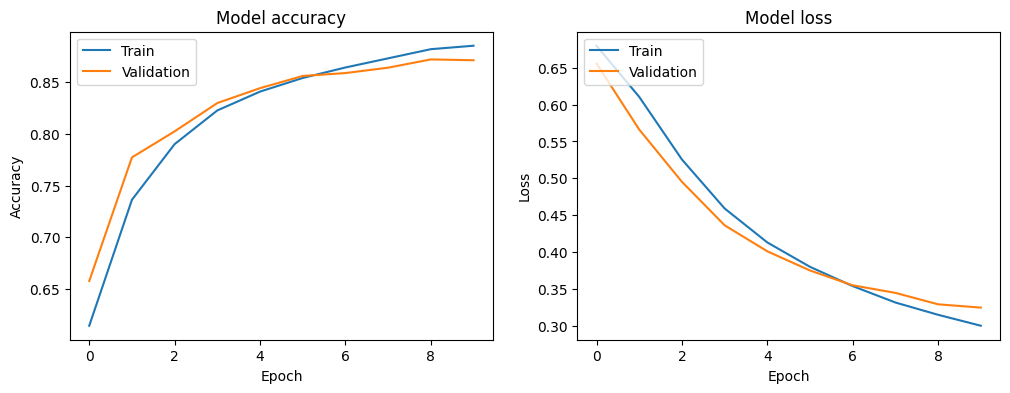

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
